# Legge di Lambert - Beer 

**Informazioni generali.** Misure e caratterizzazioni di una serie di led e costruzione di uno spettro

Dettagli del setup:
* OpAmp AD4661 
* Ad2 per l acquisizione dati
* led, fotodiodi e cuvette specificate sotto
* convertitore tensione-corrente per guidare LED
* amplificatore a trans-impedenza per leggere i dati del fotodiodo

## Progettazione di massima del circuito
La corrente massima di Output dell AD4661 è 40mA, tutti i led a nostra disposizione sostengono una corrente di max 20mA, la resistenza scelta è stata misurata con valore $ 469.87 \pm 1.61\Omega $, il voltaggio massimo in uscita dall AD4661 è di 5V, quindi la corrente massima che può passare attraverso il led è $ \sim 10mA $

Si conoscono le caratteristiche di massa dei vari diodi LED, presentate come


| Colore | Alimentazione($ \pm 0.1 $ V) [V] |
| :-: | :-: |
| rosso | 2.9 |
| arancione | 2.9 |
| giallo | 2.7 |
| verde | 2.3 |
| blu | 2.0 |
| viola | 1.8 |





## Set-up sperimentale

Le misure di due cuvette diverse sono le seguenti, con un incertezza di $\pm 0.05mm$ avendo usato un calibro ventesimale per le misure

|     |cuvetta 1|cuvetta 2|
| :-: | :-: | :-: |
|larghezza in alto [mm]| 12.4 | 12.45 |
|larghezza in basso [mm]|11.90 | 12.00 |
|spessore interno [mm]| 10.4 | 10.4 |

Nei calcoli successivi che richiedevano la larghezza della cuvetta si è considerata la media delle larghezze in alto e in basso $l = 12.2\pm0.1 \mathrm{mm}$

Si sono riempite 5 cuvette con concentrazioni crescenti del liquido in esame, rispettivamente 0% (acqua pura), 25%, 50%, 75%, 100% e queste sono state inserite nel supporto con i lati piatti rivolti verso led e fotodiodo e quelli zigrinati verso l'esterno per evitare diffrazioni parassite.

Assunto che la cuvetta contenete acqua pura non abbia assorbimento di luce, si è presa la misura della fotocorrente generata dall'incidenza della luce del diodo sul fotodiodo come "standard" per tutte le altre misure.
Si è dunque proceduto a prendere misure della fotocorrente per ogni coppia di LED e concentrazione, così da ottenere tutte le intensità disponibili.

Durante queste acquisizioni si è osservato come la fotocorrente presentasse dei plateaux, e questi ultimi sono stati successivamente analizzati.
Data la legge di Lambert-Beer si è potuto ottenere l'assorbanza relativa del liquido in esame tramite logaritmo del quoziente tra presa dati con liquido e presa dati di acqua pura.

Durante l acquisizione abbiamo osservato che, utilizzando come resistenza di feedback quella scelta per massimizzare la dinamica del segnale di LED a basso $\nu$, il segnale del fotodiodo presentava saturazione, si è dunque deciso di utilizzare differenti resistori di feedback per differenti diodi emettitori in maniera tale da garantire la massima dinamica, e dunque informazione, per ogni banda. Le scelte sono come segue

| LED | $ R_{feedback}  [\mathrm{k\Omega}] $ |
|:-:|:-:|
|Rosso - Arancione - Giallo | 221.72 $ \pm 0.76$ |
|Verde - Blu | 100.30 $ \pm 0.40$ |
|Violetto | 22.131 $ \pm 0.076$ |





## Stima dell’intensità della luce in W/cm2 a partire dal segnale misurato

Conoscendo il diametro del foro attraverso il quale il fotodiodo osserva il LED, ossia 3mm, lo stesso della dimensione del led, e conoscendo la risposta tipica del fotodiodo pari a $I_0 =  16 \frac{\mathrm{nA}}{\mathrm{lx}} $ =  $ 16 \frac{\mathrm{nA \, m^2}}{\mathrm{lm}} $  e conoscendo la corrente che scorre nel fotodiodo quando eccitato dal led violetto, corrente pari a circa $ I_{ph} = \frac{V_{ph}}{R_{feedback}} = 144 \mathrm{nA} $ si può,  tramite una semplice relazione, stimare il flusso luminoso sul fotodiodo, ottenendo $\Phi_L = \frac{I_{ph}}{I_0}  S[\mathrm{m^2}]  \approx 63\; \mathrm{\mu lm} $

Se si considera un angolo solido $ \Omega \approx 7 \mathrm{msr} $ ottenuto dividendo la superficie esposta del fotodiodo per la distanza tra fotodiodo e led, considerando il flusso luminoso prima ottenuto si ritrova un'intensità luminosa incidente sul fotodiodo $ I_L \approx 7 \mathrm{ mcd} $

Osservando il cono di emissione del LED quando fuori dal supporto rispetto al cono che porta la luce dall'emettitore al fotodiodo non ci si stupirebbe se l'intensità totale fosse dell'ordine di poche centinaia di candele.

Proprio questo è infatti ciò che si trova osservando i dati pubblicati dei LED, i quali riportano un'intensità per il led violetto, quello su cui si sono basati i conti precedenti, compresa tra 200 e 400 $mcd$


## Risultati ottenuti

Si sono acquisiti i dati con il programma sweepbias.ipynb, spazzando sul voltaggio in 

0


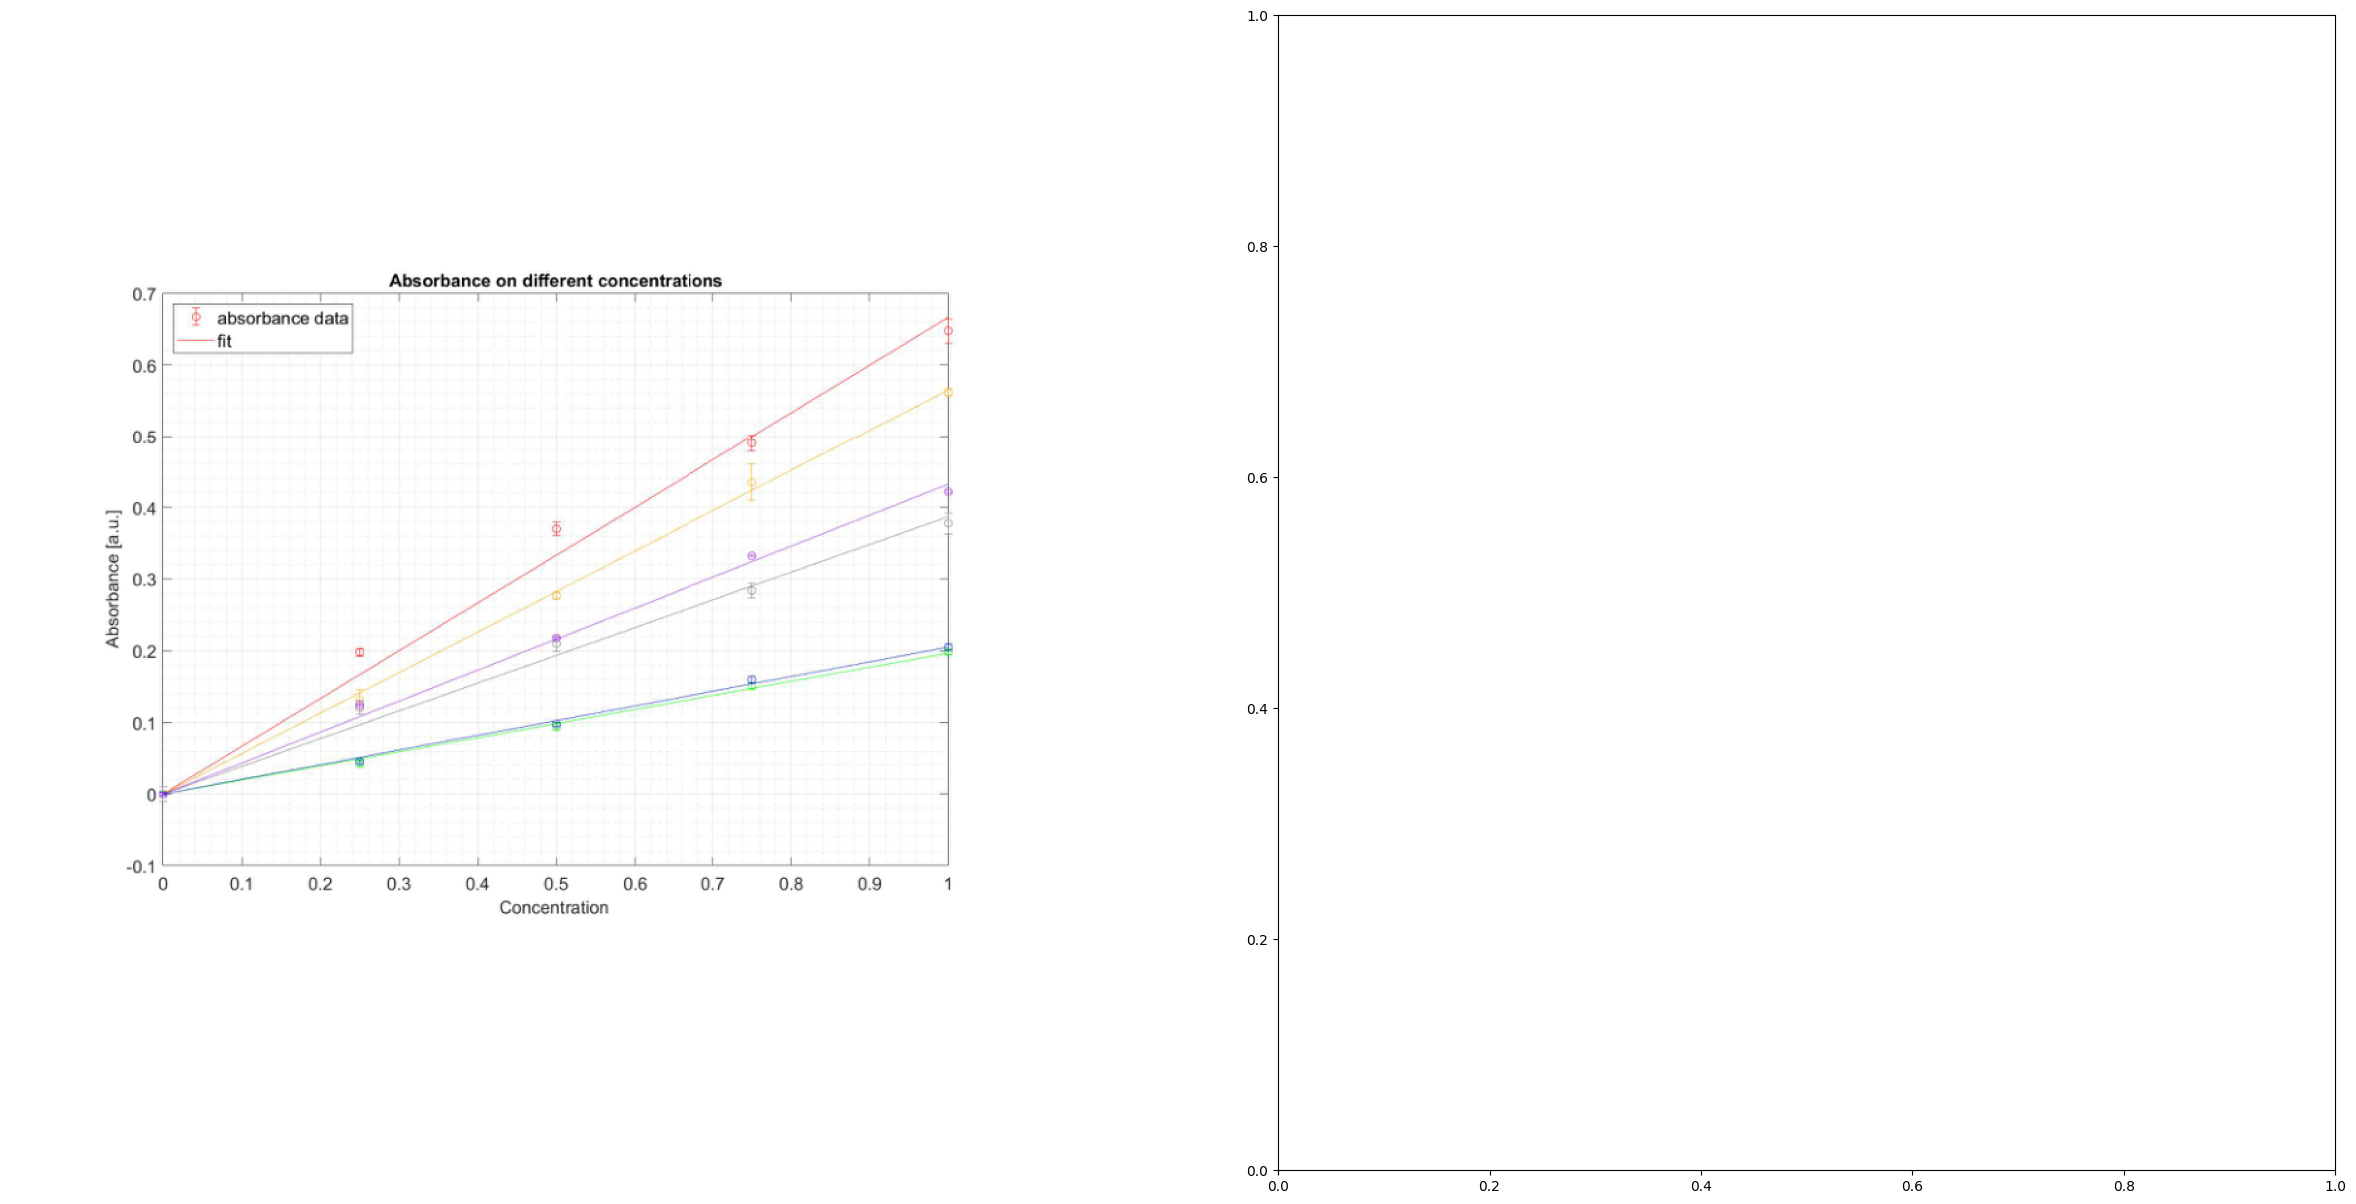

In [3]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            try:
                axes[i].imshow(imgList[i])
                axes[i].axis('off')
            except:
                pass
        else:
            for j in range(cols):
                try:
                    axes[i][j].imshow(imgList[i*cols+j])
                    axes[i][j].axis('off')
                except:
                    pass
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/Absorbance.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


Si può ben vedere come l assorbanza aumenti con la umentare della concentrazione in maniera linerare, in accprdo con la legge di Lambert -Beer 4egftiu34gti3, si osservano dibverse pendenze per diverse kunghezze d onda, in quanto il coeff di assorbaza epsilon lamba dipende dalla lunghezza d onda, non si hanno varizaioni dovute alla arghezza delle cuvette, in quanto questa è ritenuta costante per ongi test.
 



0


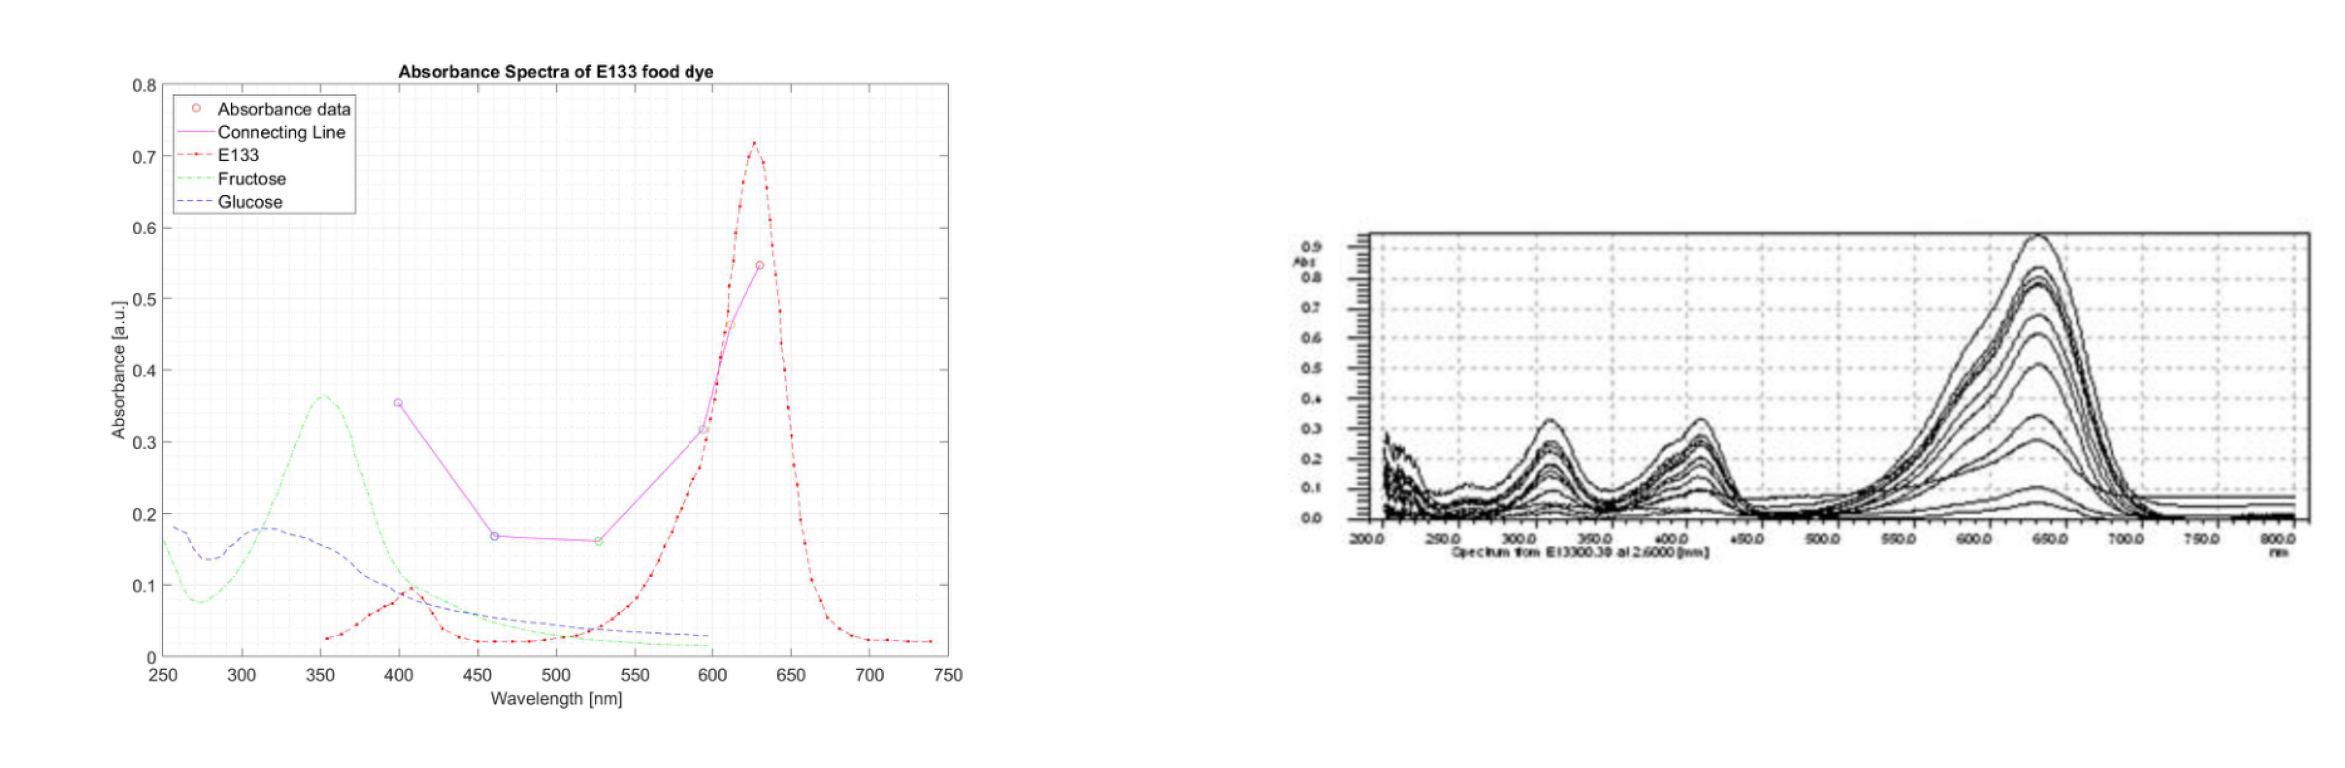

In [7]:
pdfList = ['Media/MisuraContinua.pdf', 'Media/E133_spettroLargo.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)



Lo spettro a destra riporta il coefficiente di assorbanza per diverse concentrazioni di E133, abbiamo riportato nel grafico a sinistra la curva che meglio approssimava la concentrazione del liquido in esame.
Si nota che lo spettro dell E133 ha un andamento qualitativamente simile ma con un' intensità minore rispetto ai dati ottenuti sperimentalmente. Tenendo conto del contributo nell assorbimento anche di altri ingredienti del powerade (glucosio e fruttosio sono i primi due in percentuale) e sovrapponendo i rispettivi spettri si vede che nei punti campionati lo spettro è compatibile con quello ottenuto sperimentalmente.

Si osserva in particolare anche la presenza di un picco per le alte frequenze nei dati sperimentali che non potrebbe essere ben spiegato solo dal comportamento dell'E133, per questo è necessario considerare i componenti zuccherati.
Qualsiasi altro componente della bevanda è stato ignorato in quanto una rapida ricarca dei loro spettri di assorbimento mostra contenuti rilevanti solo a lunghezze d'onda molto minori o molto maggio di quelle in esame.

## Fonti
 Spettro di assorbanza di E133 https://pubs.rsc.org/en/content/articlelanding/2013/ay/c3ay40362a
 
 Spettro di assorbanza di glucosio e fruttosio https://www.researchgate.net/figure/Effects-of-a-fructose-b-glucose-and-c-galactose-concentrations-on-UV-Vis-spectra_fig3_308517

 Spettro di assorbanza di E133 per diverse concentrazioni https://www.researchgate.net/publication/248706908_Determination_of_sulfonated_water-soluble_azo_dyes_in_foods_by_SPE_coupled_with_HPTLC-DAD?enrichId=rgreq-1056b5d6745592ab919f6f4945b5d861-XXX&enrichSource=Y292ZXJQYWdlOzI0ODcwNjkwODtBUzo5NzE4MjU2NDc0OTMzM0AxNDAwMTgxNTM4OTU4&el=1_x_3

 



 

 

 

